In [2]:
import os
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sys.path.append('../src/')
import CONST

from _000_preprocess import _000_preprocess

In [3]:
trn_path, tst_path = _000_preprocess()
trn = pd.read_feather(trn_path)
tst = pd.read_feather(tst_path)

In [3]:
trn.head(10).T

0         1         2         3  \
Altitude                                9.9998    42.007    9.9987    0.0007   
Mach                                      0.25      0.84      0.25    0.0001   
FlightRegime                                 2         6         2         1   
PowerSettingTra                            100       100       100       100   
T2TotalTemperatureAtFanInletR           489.05       445    489.05    518.67   
T24TotalTemperatureAtLpcOutletR         604.56    549.52    604.17    642.64   
T30TotalTemperatureAtHpcOutletR         1488.6    1345.3    1494.1    1583.4   
T50TotalTemperatureAtLptOutletR         1299.7    1119.9    1298.9    1395.2   
P2PressureAtFanInletPsia                 10.52      3.91     10.52     14.62   
P15TotalPressureInBypassDuctPsia         15.49      5.71     15.49      21.6   
P30TotalPressureAtHpcOutletPsia         394.74    138.67    395.05    554.88   
NfPhysicalFanSpeedRpm                   2318.8    2212.2    2318.8      2388   
NcPhysicalCoreSpeedRpm                  8784.7    8335.1    8792.4    9068.5   
EprEnginePressureRatioP50P2               1.26      1.02      1.26       1.3   
Ps30StaticPressureAtHpcOutletPsia        45.15     41.63     45.03     47.22   
PhiRatioOfFuelFlowToPs30PpsPsi          372.33    130.79    372.33     522.8   
NrfCorrectedFanSpeedRpm                 2388.1    2388.1      2388      2388   
NrcCorrectedCoreSpeedRpm                8139.1    8092.8      8142    8152.1   
BprBypassRatio                          8.6299    9.3408    8.6362    8.3999   
FarbBurnerFuelAirRatio                    0.03      0.02      0.03      0.03   
HtbleedBleedEnthalpy                       368       330       368       392   
NfDmdDemandedFanSpeedRpm                  2319      2212      2319      2388   
PcnfrDmdDemandedCorrectedFanSpeedRpm       100       100       100       100   
W31HptCoolantBleedLbmS                   28.73     10.58     28.63     39.13   
W32LptCoolantBleedLbmS                  17.167    6.3236    17.205    23.428   
Engine                                Train087  Train087  Train087  Train087   
FlightNo                                     1         2         3         4   

                                             4         5         6         7  \
Altitude                                0.0019    20.002    34.998    9.9989   
Mach                                         0       0.7    0.8407    0.2506   
FlightRegime                                 1         3         5         2   
PowerSettingTra                            100       100       100       100   
T2TotalTemperatureAtFanInletR           518.67    491.19    449.44    489.05   
T24TotalTemperatureAtLpcOutletR         642.04    606.48    555.07    604.42   
T30TotalTemperatureAtHpcOutletR         1582.5    1487.8    1356.1    1493.6   
T50TotalTemperatureAtLptOutletR         1399.1    1246.2      1124    1298.4   
P2PressureAtFanInletPsia                 14.62      9.35      5.48     10.52   
P15TotalPressureInBypassDuctPsia         21.61     13.65         8     15.49   
P30TotalPressureAtHpcOutletPsia         554.39    335.03    195.15    394.96   
NfPhysicalFanSpeedRpm                     2388    2323.9    2223.1    2318.8   
NcPhysicalCoreSpeedRpm                  9061.3    8726.2    8358.3    8781.8   
EprEnginePressureRatioP50P2                1.3      1.08      1.02      1.26   
Ps30StaticPressureAtHpcOutletPsia        47.15     44.02     41.54     45.16   
PhiRatioOfFuelFlowToPs30PpsPsi          522.67    315.17    183.54     372.4   
NrfCorrectedFanSpeedRpm                   2388    2388.1    2388.2    2388.1   
NrcCorrectedCoreSpeedRpm                8140.2    8072.6    8077.8    8142.6   
BprBypassRatio                          8.3809    9.1997    9.2692    8.5698   
FarbBurnerFuelAirRatio                    0.03      0.02      0.02      0.03   
HtbleedBleedEnthalpy                       391       363       333       370   
NfDmdDemandedFanSpeedRpm                  23

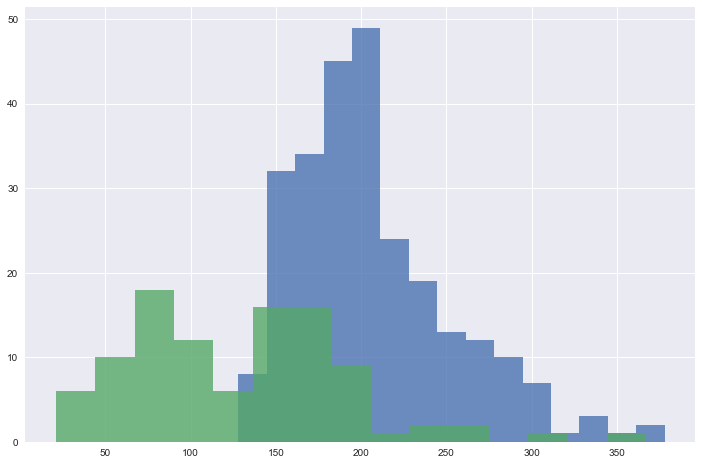

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes()
trn.groupby('Engine').FlightNo.max().hist(bins=15, ax=ax, alpha=.8)
tst.groupby('Engine').FlightNo.max().hist(bins=15, ax=ax, alpha=.8)
plt.show()

レジームごとに一定値が入っているカラムがいくつかあるので可視化する

In [6]:
trn.columns

Index(['Altitude', 'Mach', 'FlightRegime', 'PowerSettingTra',
       'T2TotalTemperatureAtFanInletR', 'T24TotalTemperatureAtLpcOutletR',
       'T30TotalTemperatureAtHpcOutletR', 'T50TotalTemperatureAtLptOutletR',
       'P2PressureAtFanInletPsia', 'P15TotalPressureInBypassDuctPsia',
       'P30TotalPressureAtHpcOutletPsia', 'NfPhysicalFanSpeedRpm',
       'NcPhysicalCoreSpeedRpm', 'EprEnginePressureRatioP50P2',
       'Ps30StaticPressureAtHpcOutletPsia', 'PhiRatioOfFuelFlowToPs30PpsPsi',
       'NrfCorrectedFanSpeedRpm', 'NrcCorrectedCoreSpeedRpm', 'BprBypassRatio',
       'FarbBurnerFuelAirRatio', 'HtbleedBleedEnthalpy',
       'NfDmdDemandedFanSpeedRpm', 'PcnfrDmdDemandedCorrectedFanSpeedRpm',
       'W31HptCoolantBleedLbmS', 'W32LptCoolantBleedLbmS', 'Engine',
       'FlightNo'],
      dtype='object')

In [7]:
tst.columns

Index(['Altitude', 'Mach', 'FlightRegime', 'PowerSettingTra',
       'T2TotalTemperatureAtFanInletR', 'T24TotalTemperatureAtLpcOutletR',
       'T30TotalTemperatureAtHpcOutletR', 'T50TotalTemperatureAtLptOutletR',
       'P2PressureAtFanInletPsia', 'P15TotalPressureInBypassDuctPsia',
       'P30TotalPressureAtHpcOutletPsia', 'NfPhysicalFanSpeedRpm',
       'NcPhysicalCoreSpeedRpm', 'EprEnginePressureRatioP50P2',
       'Ps30StaticPressureAtHpcOutletPsia', 'PhiRatioOfFuelFlowToPs30PpsPsi',
       'NrfCorrectedFanSpeedRpm', 'NrcCorrectedCoreSpeedRpm', 'BprBypassRatio',
       'FarbBurnerFuelAirRatio', 'HtbleedBleedEnthalpy',
       'NfDmdDemandedFanSpeedRpm', 'PcnfrDmdDemandedCorrectedFanSpeedRpm',
       'W31HptCoolantBleedLbmS', 'W32LptCoolantBleedLbmS', 'Engine',
       'FlightNo'],
      dtype='object')

In [18]:
trn.shape

(53759, 27)

In [19]:
tst.shape

(12817, 27)

In [26]:
tmp = (pd.concat([trn, tst], axis=0).groupby(['FlightRegime']).var() == 0).all(axis=0)
regime_zero_variance = tmp.index[tmp].values

['PowerSettingTra' 'T2TotalTemperatureAtFanInletR'
 'P2PressureAtFanInletPsia' 'NfDmdDemandedFanSpeedRpm'
 'PcnfrDmdDemandedCorrectedFanSpeedRpm']


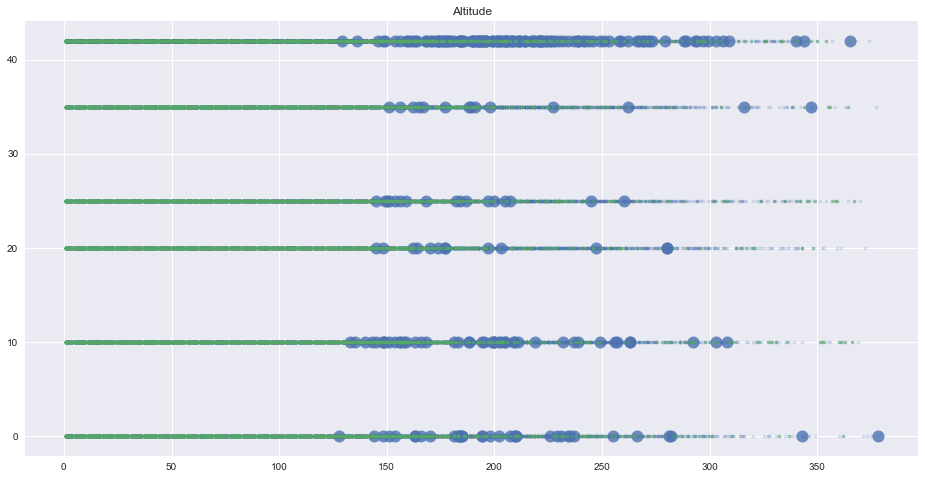

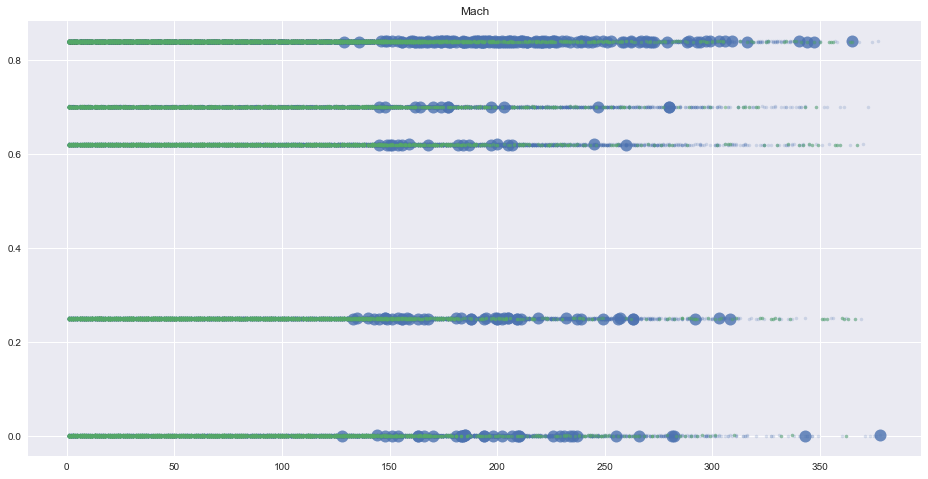

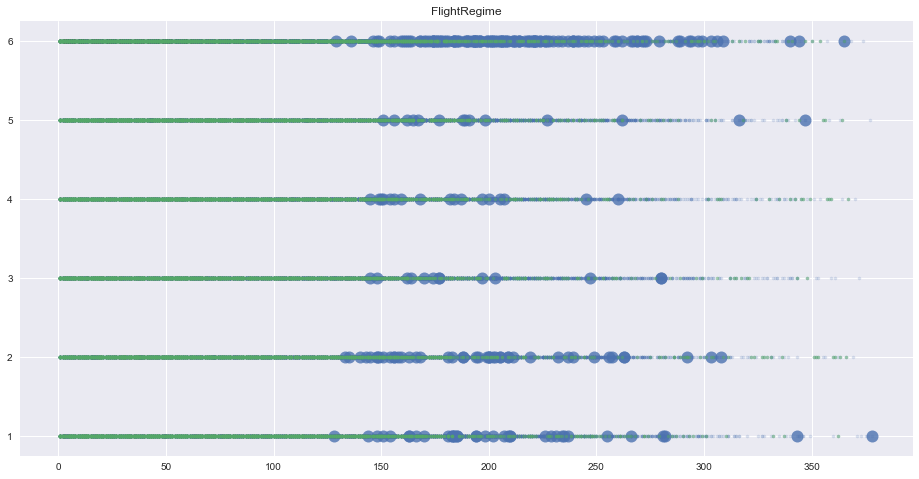

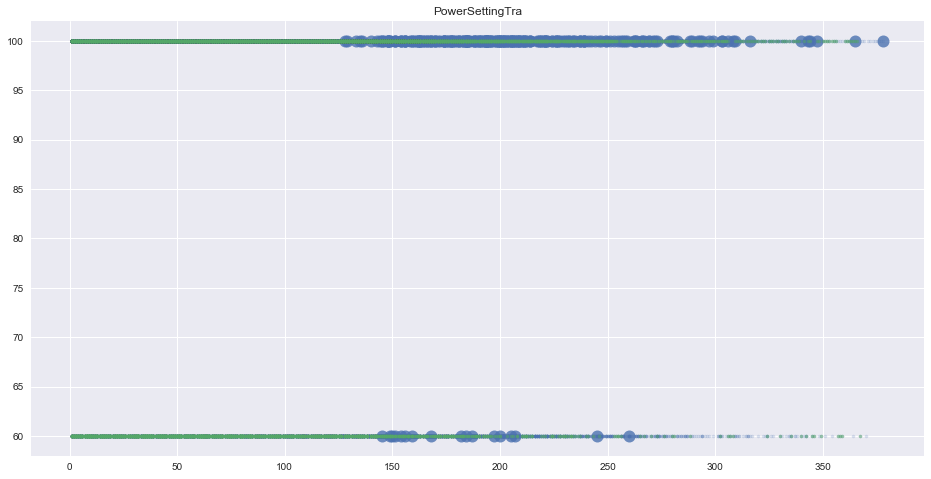

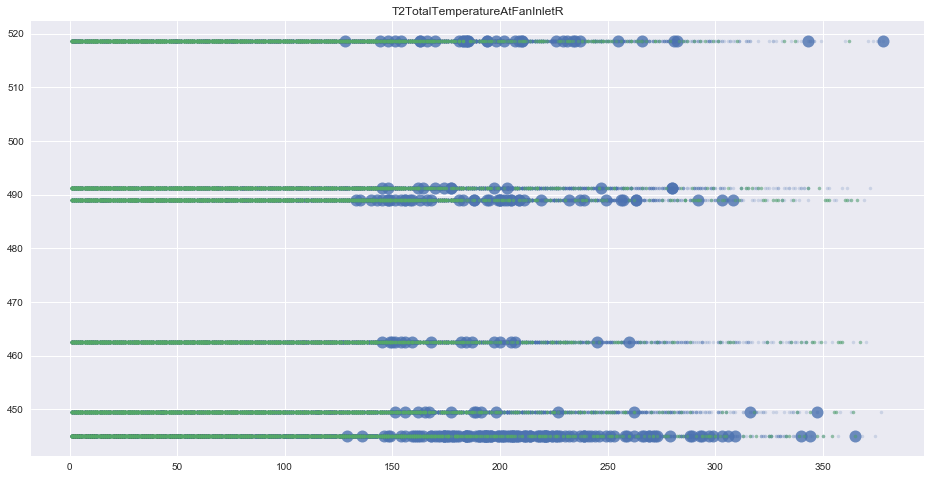

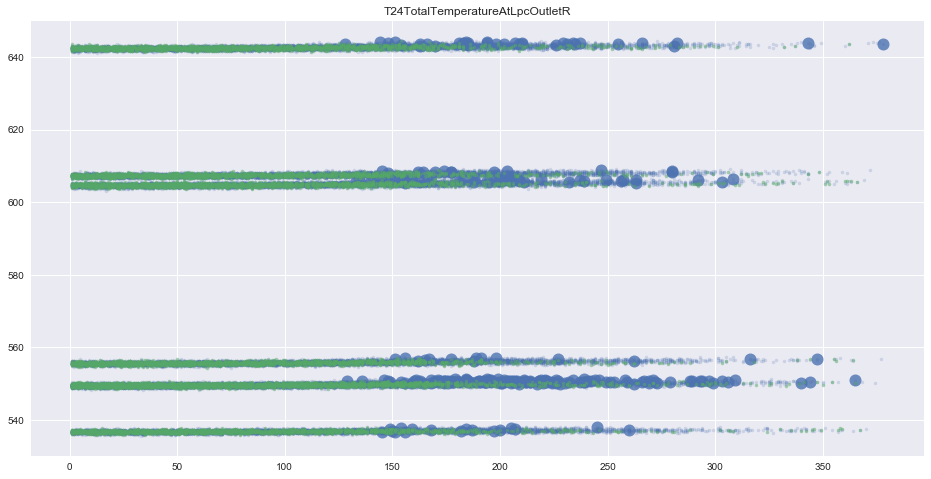

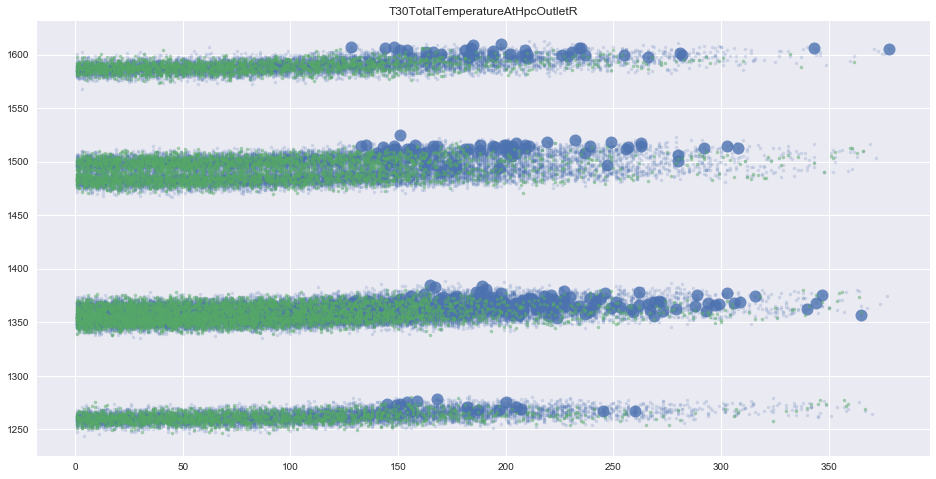

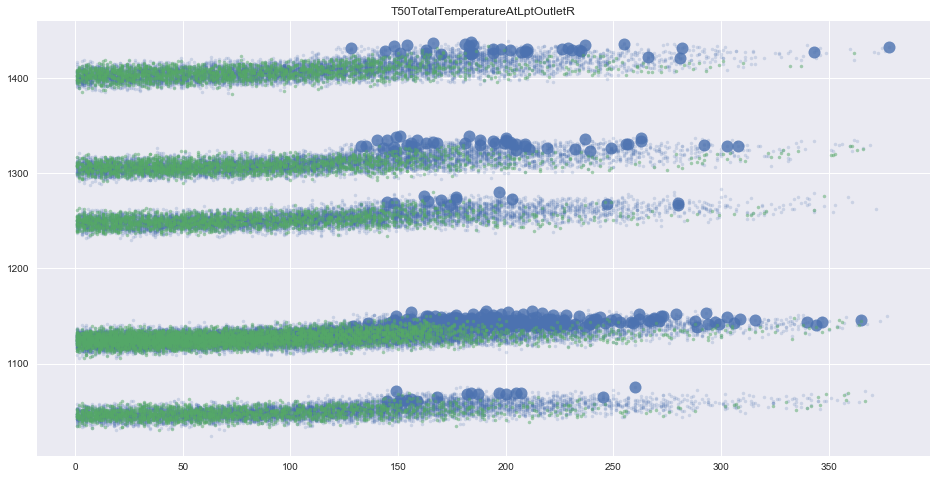

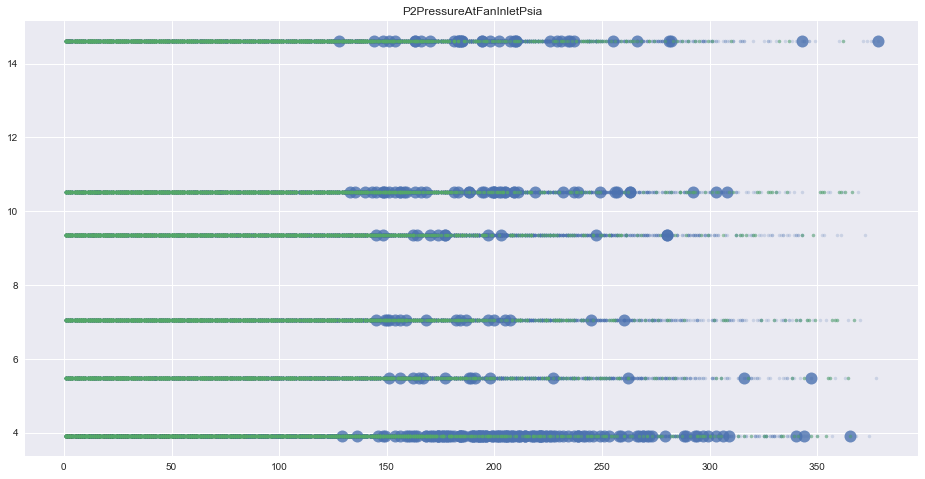

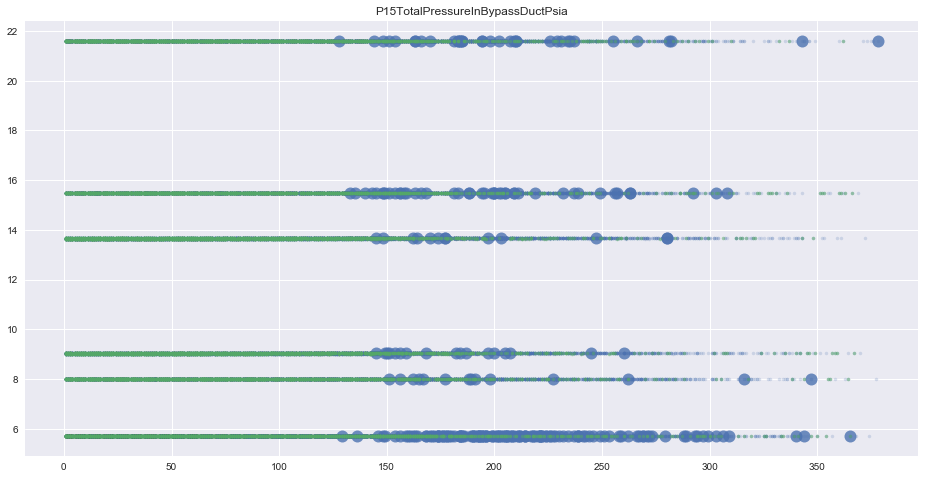

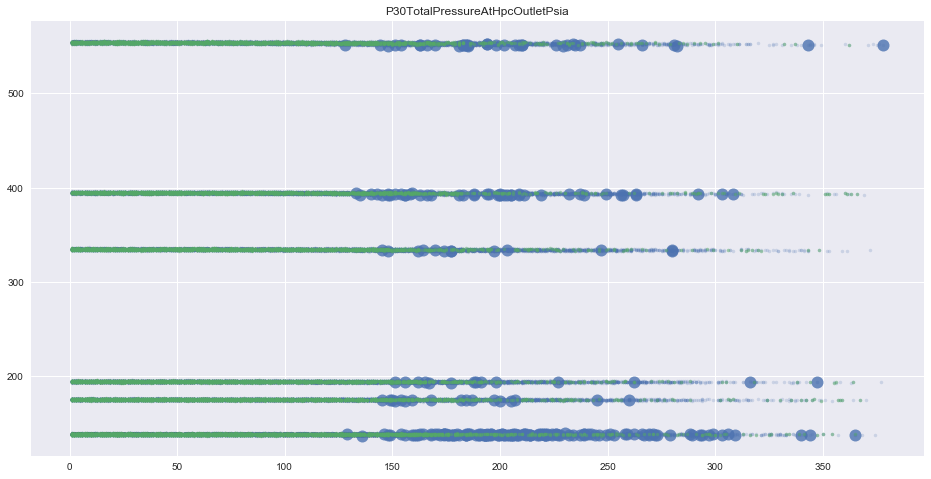

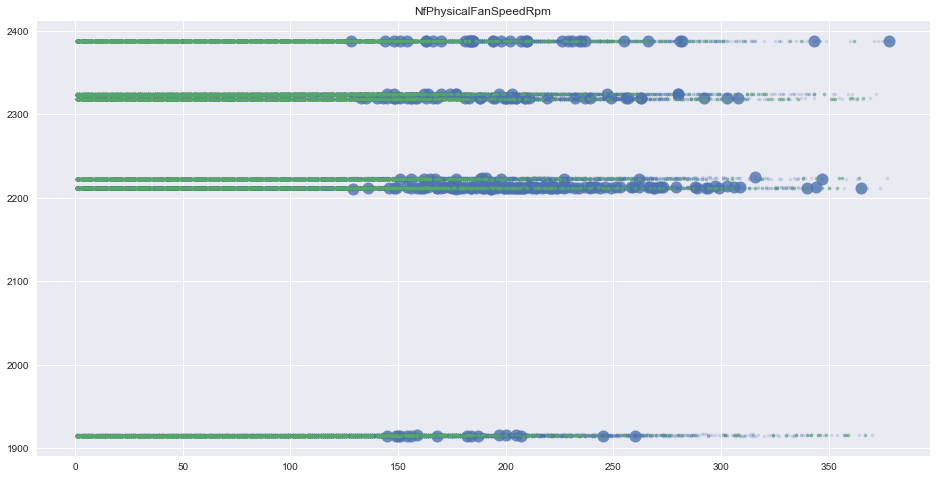

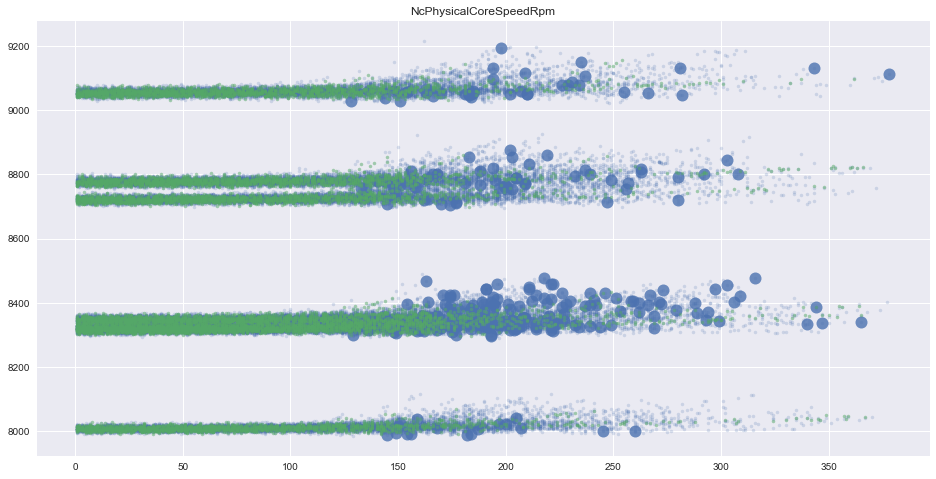

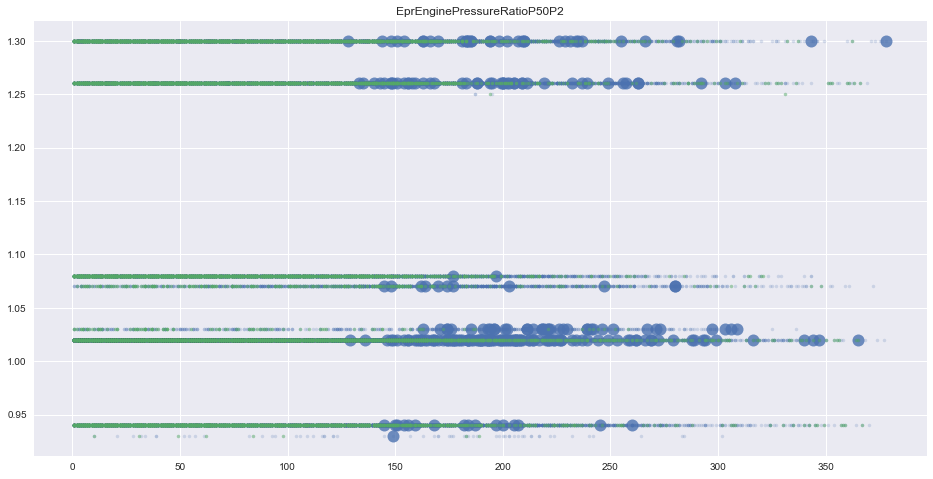

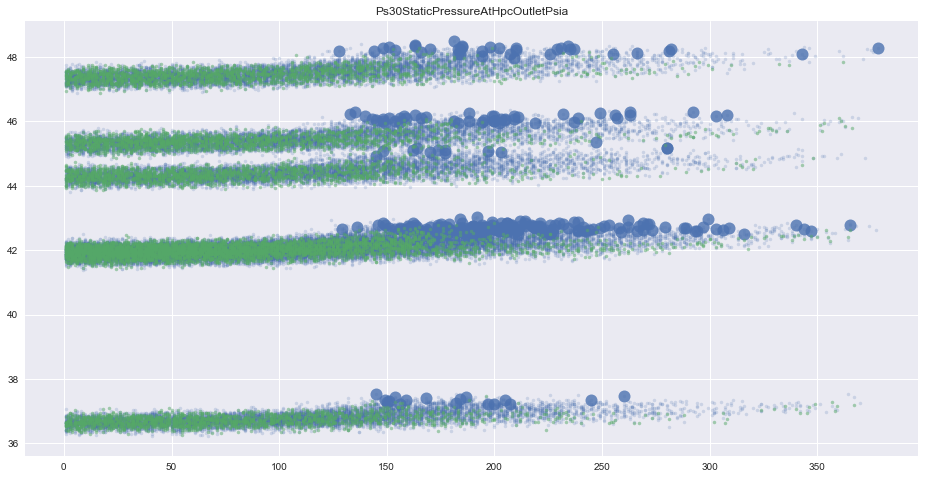

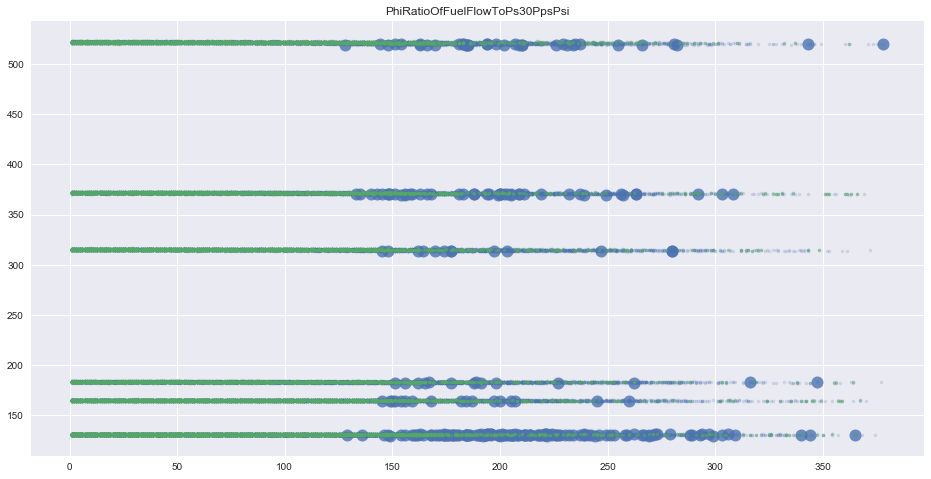

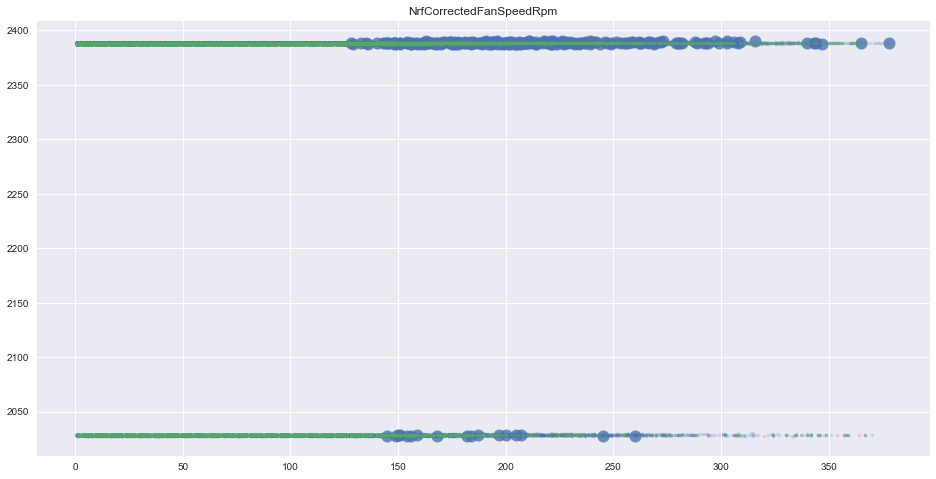

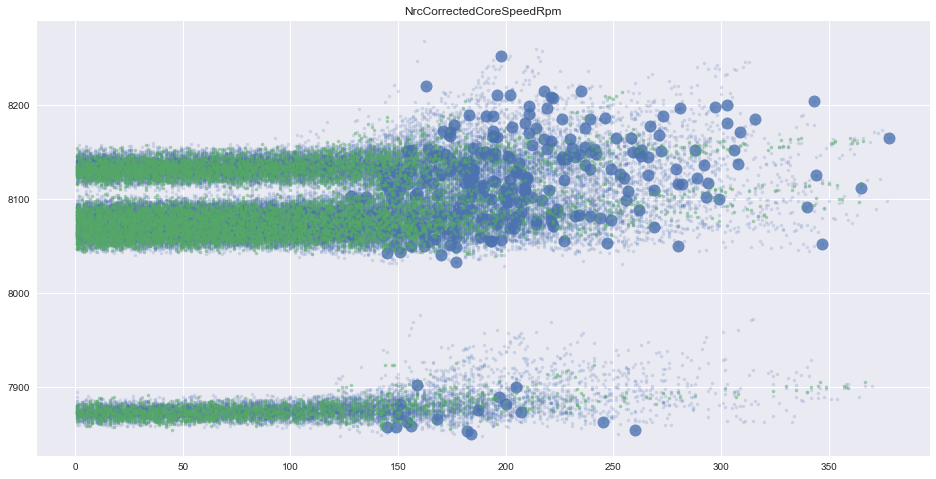

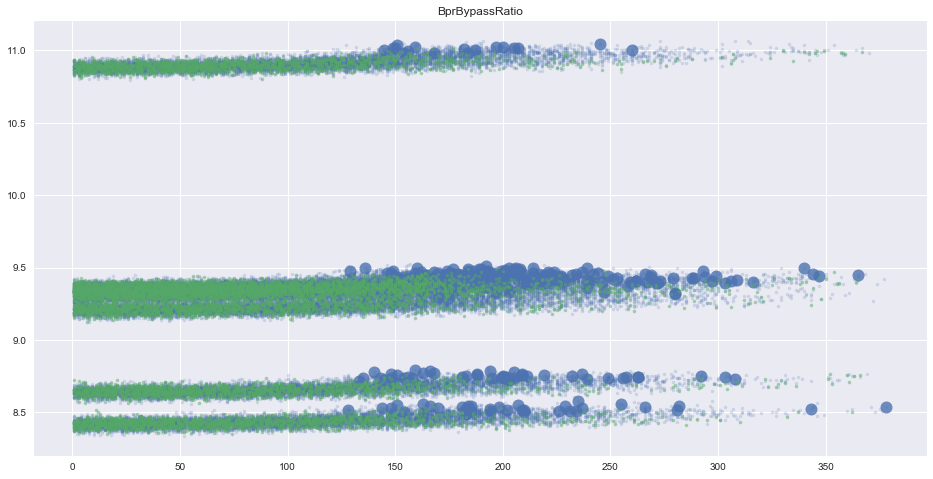

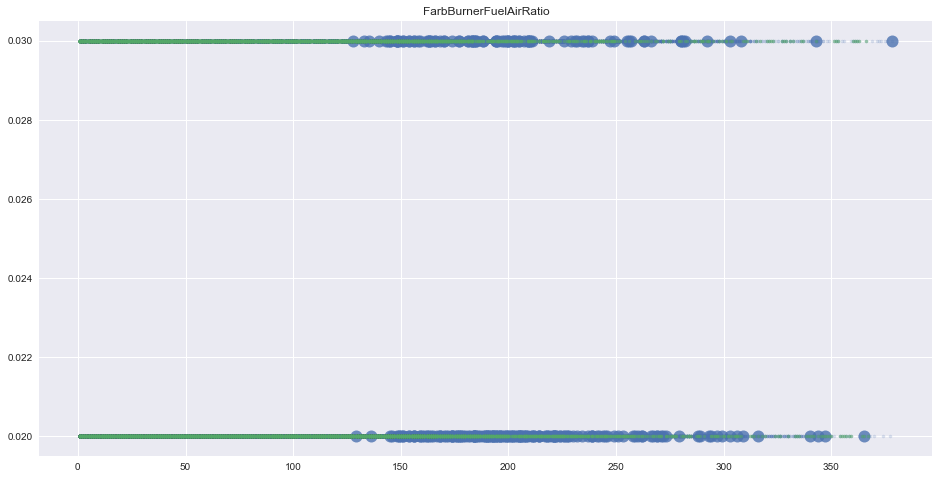

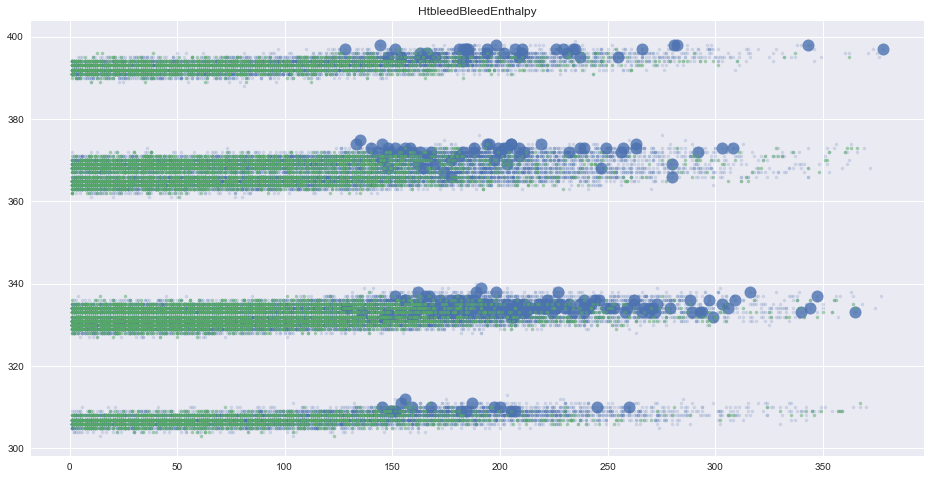

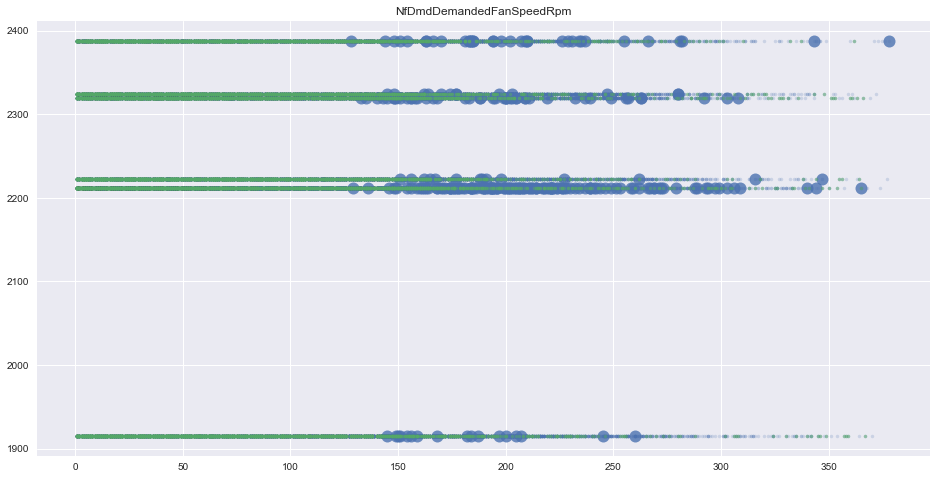

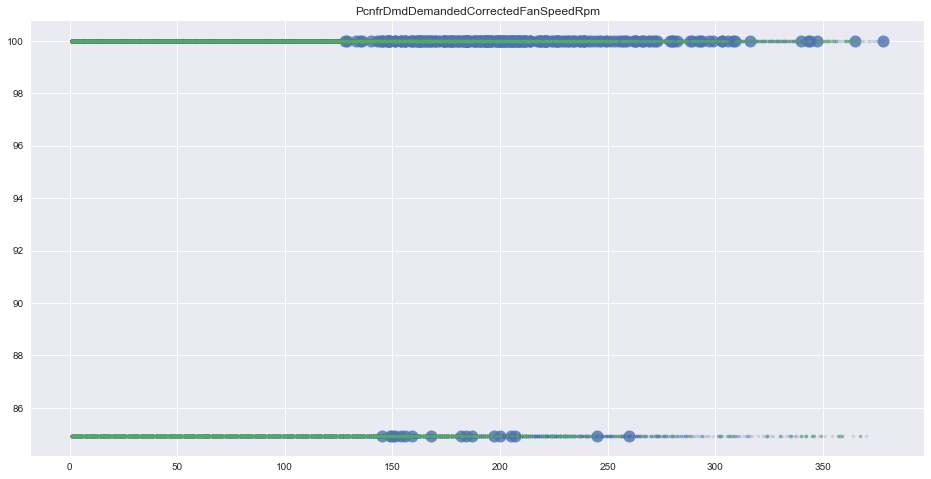

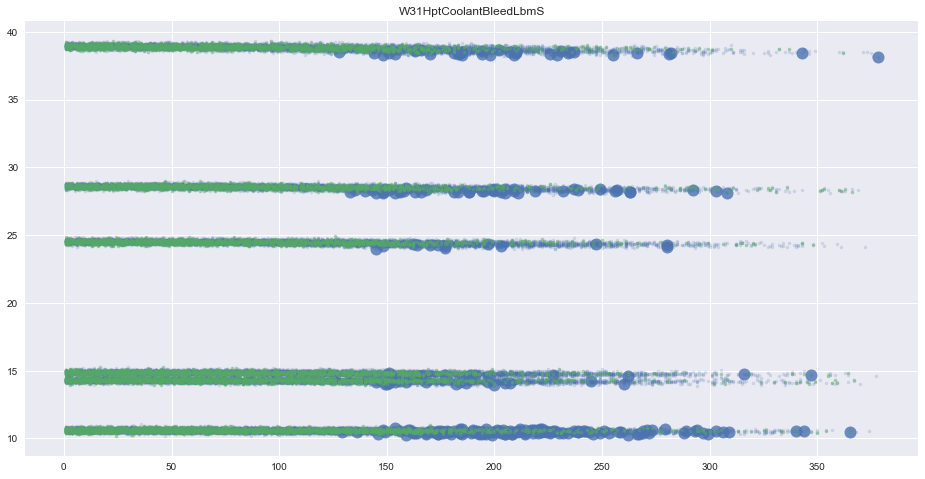

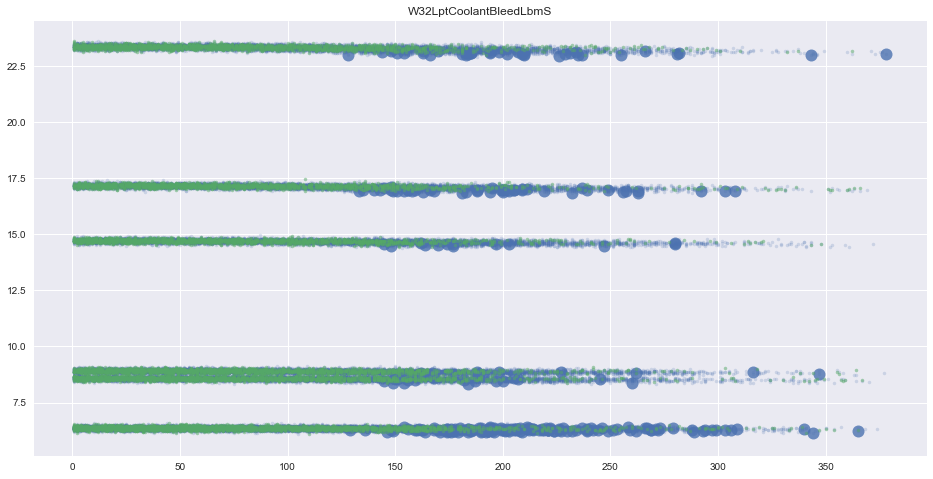

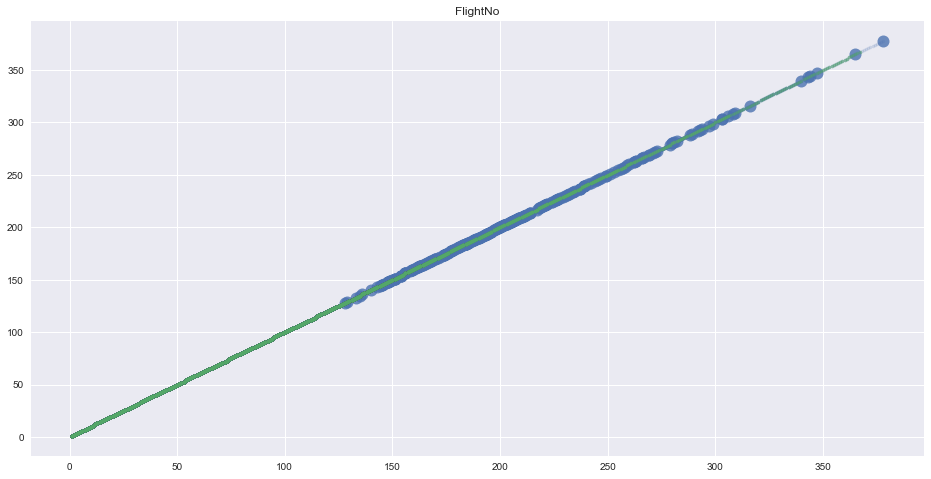

In [27]:
cp = sns.color_palette(n_colors=6)
# 数値データに関して時系列プロットを行う, Regimeで色分け
for c in trn.columns[trn.dtypes != object]:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    for e, g in trn.groupby('Engine'):
        for r, _g in g.groupby(['FlightRegime']):
            plt.plot(_g['FlightNo'], _g[c], '.', c=cp[0], alpha=.2)
        last = g[g.FlightNo == g.FlightNo.max()]
        plt.plot(last['FlightNo'], last[c], 'o', markersize=12, c=cp[0], alpha=.8)
    plt.plot(tst['FlightNo'], tst[c], '.', c=cp[2], alpha=.5)
    plt.show()

In [4]:
from _000_preprocess import _002_preprocess
trn_path, tst_path = _002_preprocess()

Train data offset
Offset Feature = T24TotalTemperatureAtLpcOutletR
Offset Feature = T30TotalTemperatureAtHpcOutletR
Offset Feature = T50TotalTemperatureAtLptOutletR
Offset Feature = NcPhysicalCoreSpeedRpm
Offset Feature = Ps30StaticPressureAtHpcOutletPsia
Offset Feature = NrcCorrectedCoreSpeedRpm
Offset Feature = BprBypassRatio
Offset Feature = HtbleedBleedEnthalpy
Offset Feature = W31HptCoolantBleedLbmS
Offset Feature = W32LptCoolantBleedLbmS
Test data offset
Offset Feature = T24TotalTemperatureAtLpcOutletR
Offset Feature = T30TotalTemperatureAtHpcOutletR
Offset Feature = T50TotalTemperatureAtLptOutletR
Offset Feature = NcPhysicalCoreSpeedRpm
Offset Feature = Ps30StaticPressureAtHpcOutletPsia
Offset Feature = NrcCorrectedCoreSpeedRpm
Offset Feature = BprBypassRatio
Offset Feature = HtbleedBleedEnthalpy
Offset Feature = W31HptCoolantBleedLbmS
Offset Feature = W32LptCoolantBleedLbmS


In [5]:
trn = pd.read_feather(trn_path)
tst = pd.read_feather(tst_path)

In [9]:
trn.head().T

0         1         2  \
OffsetT24TotalTemperatureAtLpcOutletR           0         0     -0.39   
OffsetT30TotalTemperatureAtHpcOutletR           0         0       5.5   
OffsetT50TotalTemperatureAtLptOutletR           0         0      -0.8   
OffsetNcPhysicalCoreSpeedRpm                    0         0       7.7   
OffsetPs30StaticPressureAtHpcOutletPsia         0         0     -0.12   
OffsetNrcCorrectedCoreSpeedRpm                  0         0       2.9   
OffsetBprBypassRatio                            0         0    0.0063   
OffsetHtbleedBleedEnthalpy                      0         0         0   
OffsetW31HptCoolantBleedLbmS                    0         0      -0.1   
OffsetW32LptCoolantBleedLbmS                    0         0     0.038   
Engine                                   Train087  Train087  Train087   
FlightNo                                        1         2         3   
FlightRegime                                    2         6         2   

                                                3         4  
OffsetT24TotalTemperatureAtLpcOutletR           0      -0.6  
OffsetT30TotalTemperatureAtHpcOutletR           0      -0.9  
OffsetT50TotalTemperatureAtLptOutletR           0       3.9  
OffsetNcPhysicalCoreSpeedRpm                    0      -7.2  
OffsetPs30StaticPressureAtHpcOutletPsia         0     -0.07  
OffsetNrcCorrectedCoreSpeedRpm                  0     -11.9  
OffsetBprBypassRatio                            0    -0.019  
OffsetHtbleedBleedEnthalpy                      0        -1  
OffsetW31HptCoolantBleedLbmS                    0     -0.04  
OffsetW32LptCoolantBleedLbmS                    0    -0.027  
Engine                                   Train087  Train087  
FlightNo                                        4         5  
FlightRegime                                    1         1

In [8]:
tst.head().T 

0        1        2        3  \
OffsetT24TotalTemperatureAtLpcOutletR          0        0        0        0   
OffsetT30TotalTemperatureAtHpcOutletR          0        0        0        0   
OffsetT50TotalTemperatureAtLptOutletR          0        0        0        0   
OffsetNcPhysicalCoreSpeedRpm                   0        0        0        0   
OffsetPs30StaticPressureAtHpcOutletPsia        0        0        0        0   
OffsetNrcCorrectedCoreSpeedRpm                 0        0        0        0   
OffsetBprBypassRatio                           0        0        0        0   
OffsetHtbleedBleedEnthalpy                     0        0        0        0   
OffsetW31HptCoolantBleedLbmS                   0        0        0        0   
OffsetW32LptCoolantBleedLbmS                   0        0        0        0   
Engine                                   Test082  Test082  Test082  Test082   
FlightNo                                       1        2        3        4   
FlightRegime                                   2        3        5        6   

                                               4  
OffsetT24TotalTemperatureAtLpcOutletR          0  
OffsetT30TotalTemperatureAtHpcOutletR          0  
OffsetT50TotalTemperatureAtLptOutletR          0  
OffsetNcPhysicalCoreSpeedRpm                   0  
OffsetPs30StaticPressureAtHpcOutletPsia        0  
OffsetNrcCorrectedCoreSpeedRpm                 0  
OffsetBprBypassRatio                           0  
OffsetHtbleedBleedEnthalpy                     0  
OffsetW31HptCoolantBleedLbmS                   0  
OffsetW32LptCoolantBleedLbmS                   0  
Engine                                   Test082  
FlightNo                                       5  
FlightRegime                                   4

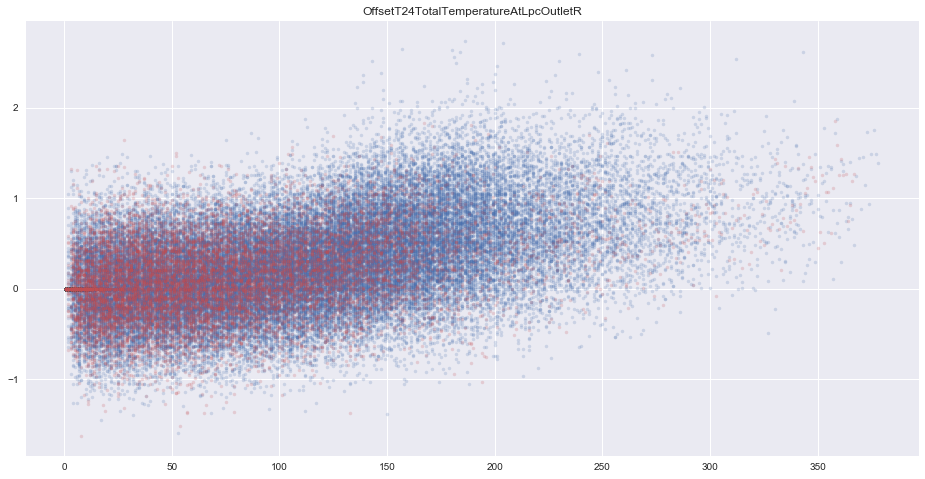

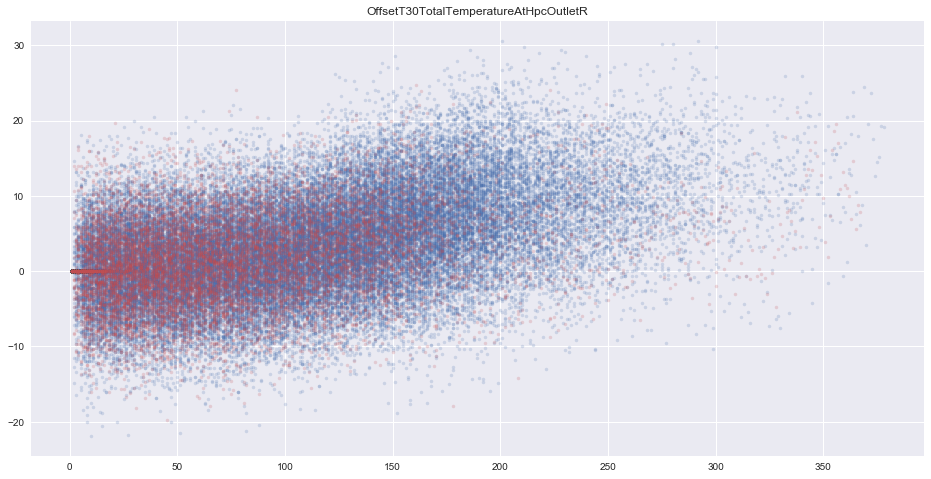

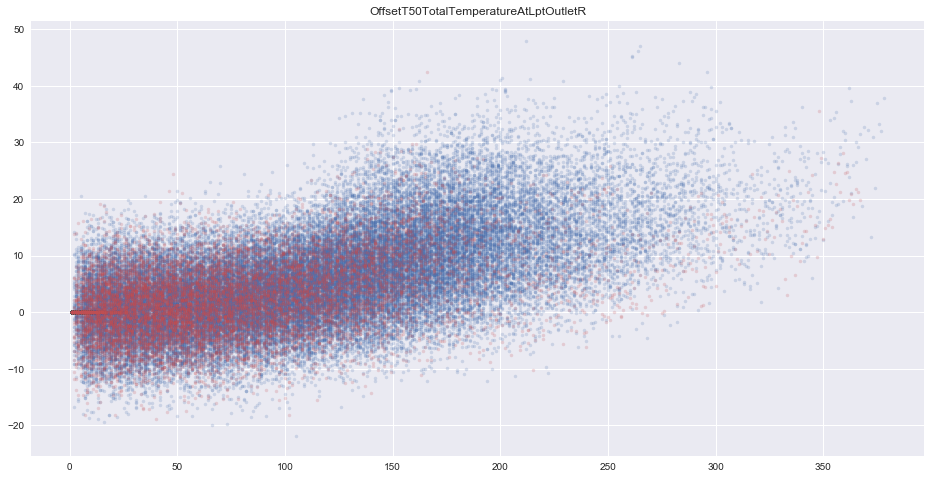

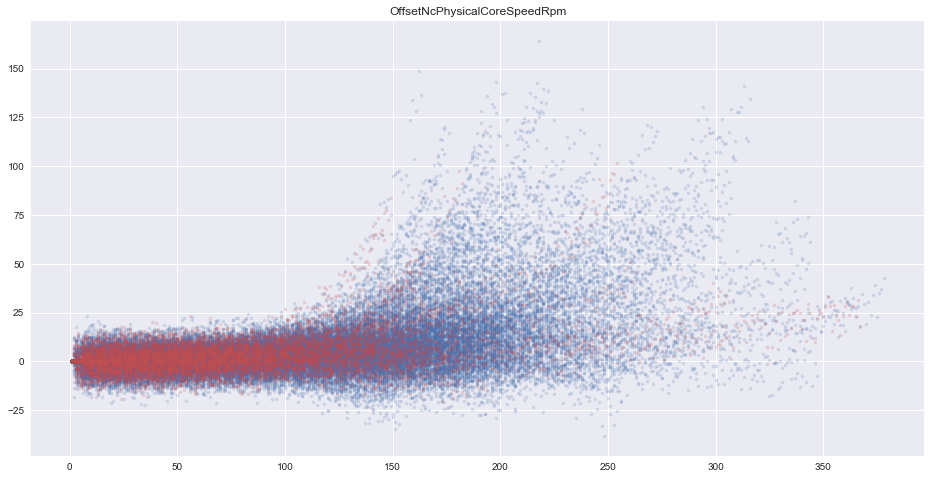

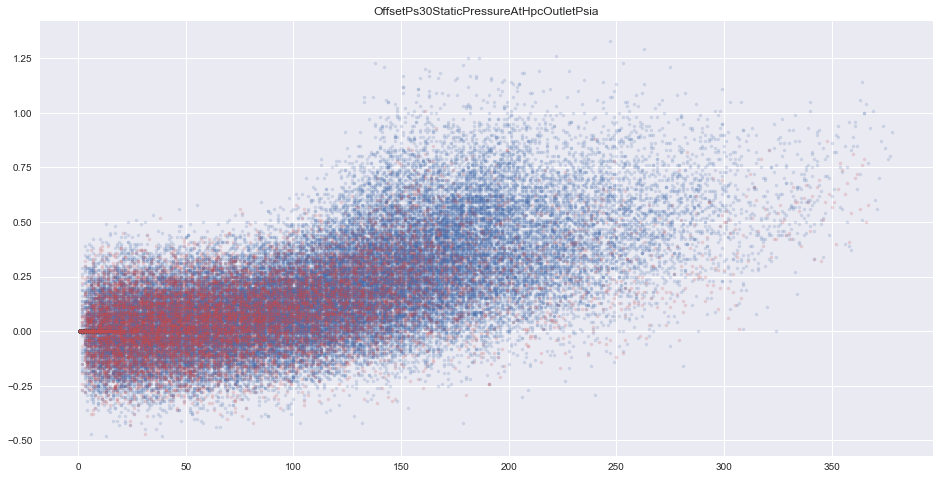

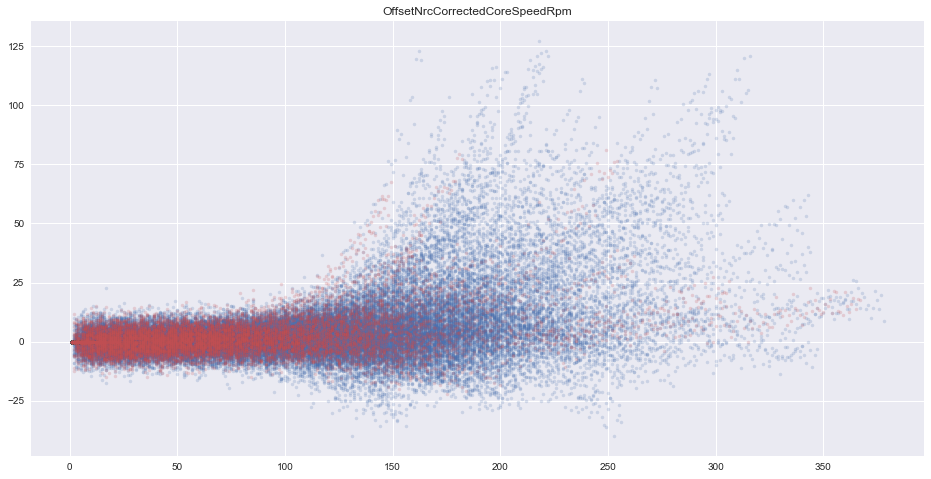

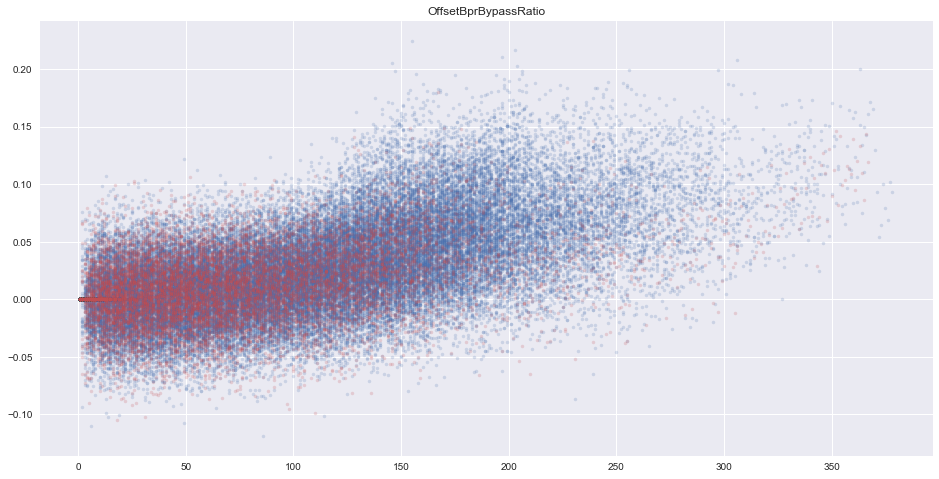

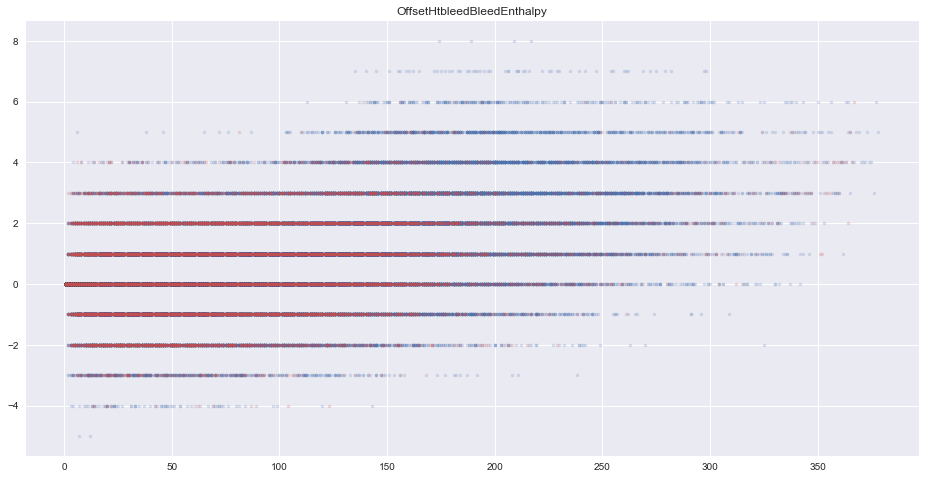

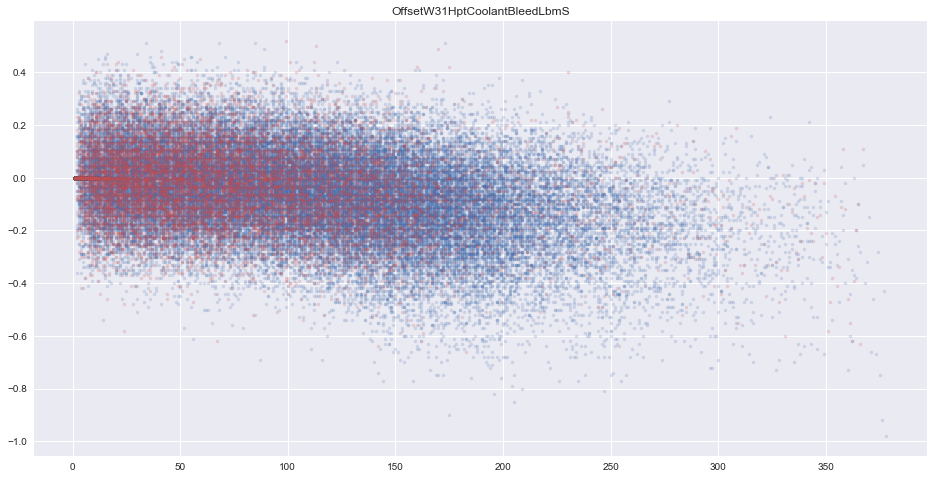

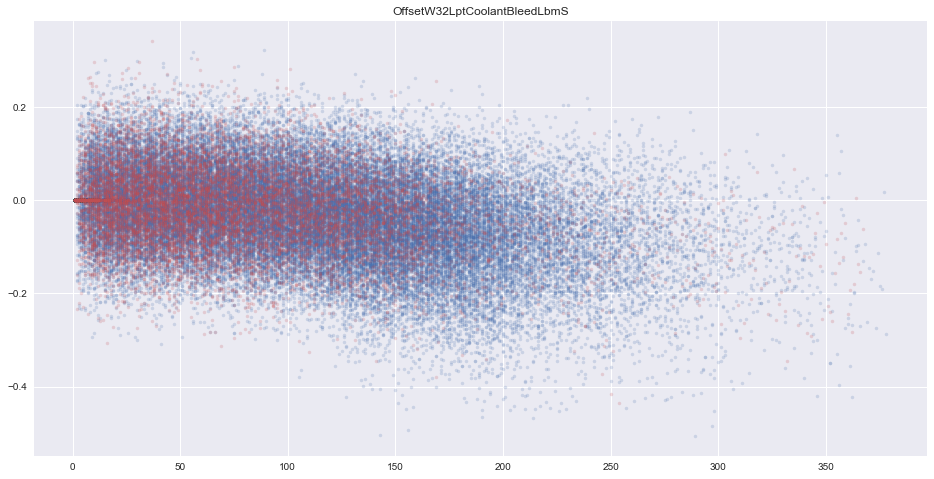

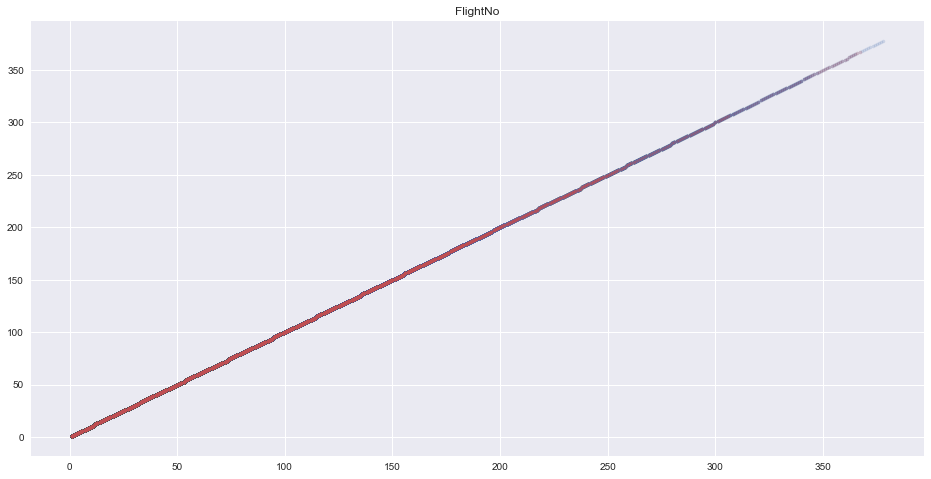

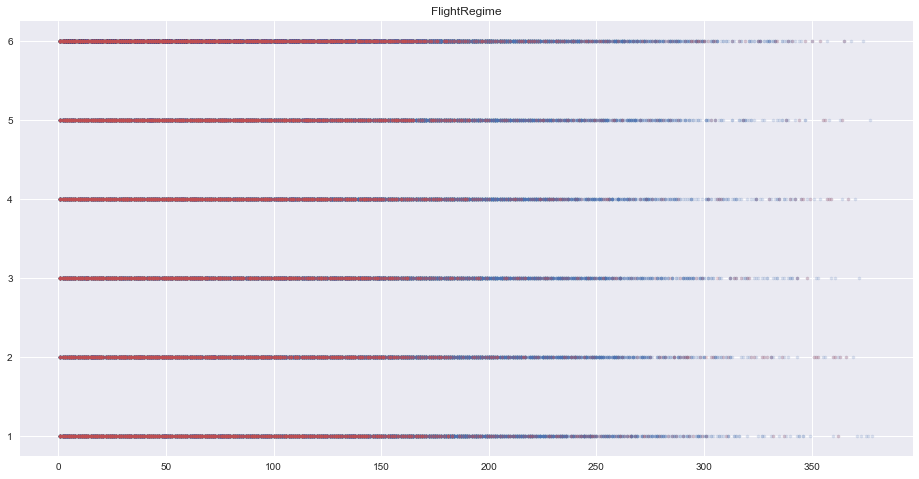

In [11]:
cp = sns.color_palette(n_colors=6)
for c in trn.columns[trn.dtypes != object]:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    for e, g in trn.groupby('Engine'):
        plt.plot(g['FlightNo'], g[c], '.', c=cp[0], alpha=.2)
    for e, g in tst.groupby('Engine'):
        plt.plot(g['FlightNo'], g[c], '.', c=cp[2], alpha=.2)
    plt.show()